In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:

l = 1
g = 9.81
m = 0.1


dt = 0.005
n_steps = 20000




t_old = 0
t_new = 0


theta_old = 20*(np.pi/180)
theta_dot_old = 0
theta_dot_dot_old = -(g/l)*np.sin(theta_old)


def euler_method(dt=0.005, n_steps=20000, initial_theta_degrees=20, l=1,m=0.1):
    theta_old = initial_theta_degrees*(np.pi/180)

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)

    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old


    t_old = 0
    t_new = 0


    
    theta_dot_old = 0
    theta_dot_dot_old = -(g/l)*np.sin(theta_old)


    for i in range(n_steps):
        t_new += dt

        theta_dot_dot_old = -(g/l)*np.sin(theta_old)
        
        theta_new = theta_old + theta_dot_old*dt
        theta_dot_new = theta_dot_old + theta_dot_dot_old*dt

        ### write out
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new

        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas



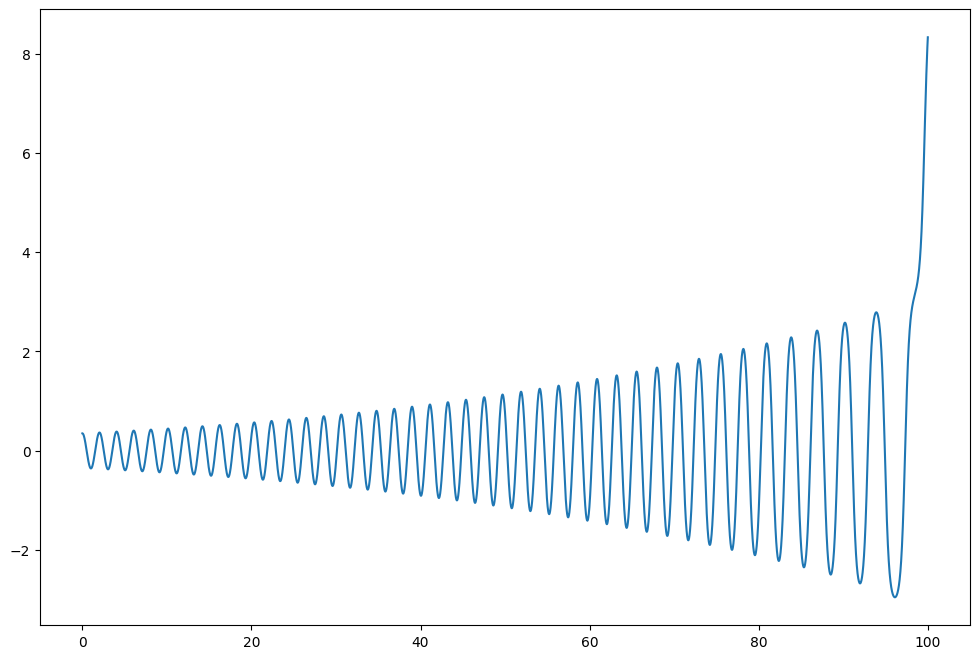

In [5]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method()

plt.figure(figsize=(12,8))
plt.plot(euler_times, euler_thetas)

## well ... this is a sigma problem
i know!
we use the runge-kutte method for epicness!

how does it work you ask?

well like a bomb ! .... a 4th order bomb!

$$\theta(t_0 + h) = \theta(t_0) + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}h  = \theta(t_0) + (\frac{1}{6}k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4)\Delta t$$

What is k you may ask? well it is the 'slope' or derivative at different time steps:

$$k_1 = f(y(t_0)) $$
$$k_2 = f(y(t_0) + k_1 h/2)$$
$$k_1 = f(y(t_0) + k_2 h/2) $$
$$k_1 = f(y(t_0))  + k_3 h$$

Where $f(y(t_0))$ means $\frac{d}{dt} y(t_0)$

In [24]:
## RK4 code:
dt = 0.005
n_steps = 20000







def rk4_method(dt=0.005, n_steps=20000, initial_theta_degrees=20, l=1,m=0.1):
    theta_old = initial_theta_degrees*(np.pi/180)

    theta_dot_old = 0
    theta_dot_dot_old = -(g/l)*np.sin(theta_old)

    pos_x = np.zeros(n_steps+1)
    pos_y = np.zeros(n_steps+1)
    times = np.zeros(n_steps+1)
    thetas = np.zeros(n_steps+1)
    theta_dots = np.zeros(n_steps+1)

    pos_x[0] = np.sin(theta_old)*l
    pos_y[0] = -np.cos(theta_old)*l
    times[0] = 0
    thetas[0] = theta_old
    

    t_old = 0
    t_new = 0
    for i in range(n_steps):
        t_new += dt


        k1_theta = theta_dot_old
        k1_theta_dot = -(g/l)*np.sin(theta_old)

        k2_theta = theta_dot_old + k1_theta_dot*dt/2
        k2_theta_dot = -(g/l)*np.sin(theta_old + k1_theta*dt/2)

        k3_theta = theta_dot_old + k2_theta_dot*dt/2
        k3_theta_dot = -(g/l)*np.sin(theta_old + k2_theta*dt/2)


        k4_theta = theta_dot_old + k3_theta_dot*dt
        k4_theta_dot =  -(g/l)*np.sin(theta_old + k3_theta*dt)

        theta_new = theta_old + dt * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6 
        theta_dot_new = theta_dot_old + dt * (k1_theta_dot + 2*k2_theta_dot + 2*k3_theta_dot + k4_theta_dot)/6 


        ### write out
        pos_x[i+1] = np.sin(theta_new)*l
        pos_y[i+1] = -np.cos(theta_new)*l
        times[i+1] = times[i]+dt
        thetas[i+1] = theta_new
        theta_dots[i+1] = theta_dot_new
        ###

        theta_old = theta_new
        theta_dot_old = theta_dot_new
        
    return pos_x, pos_y, times, thetas, theta_dots





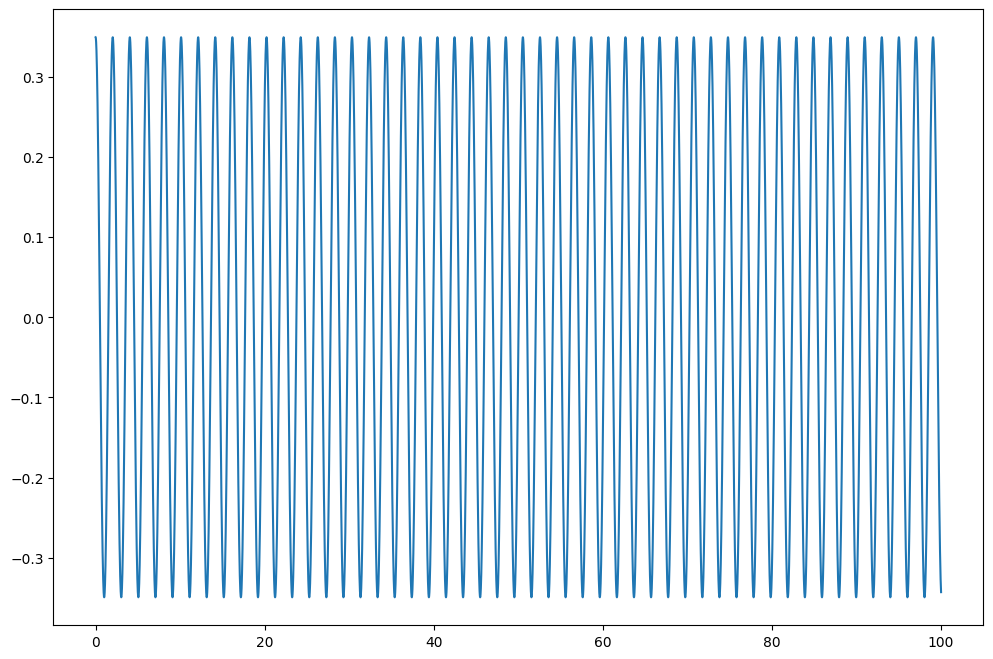

In [25]:
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method()

plt.figure(figsize=(12,8))
plt.plot(rk4_times, rk4_thetas)

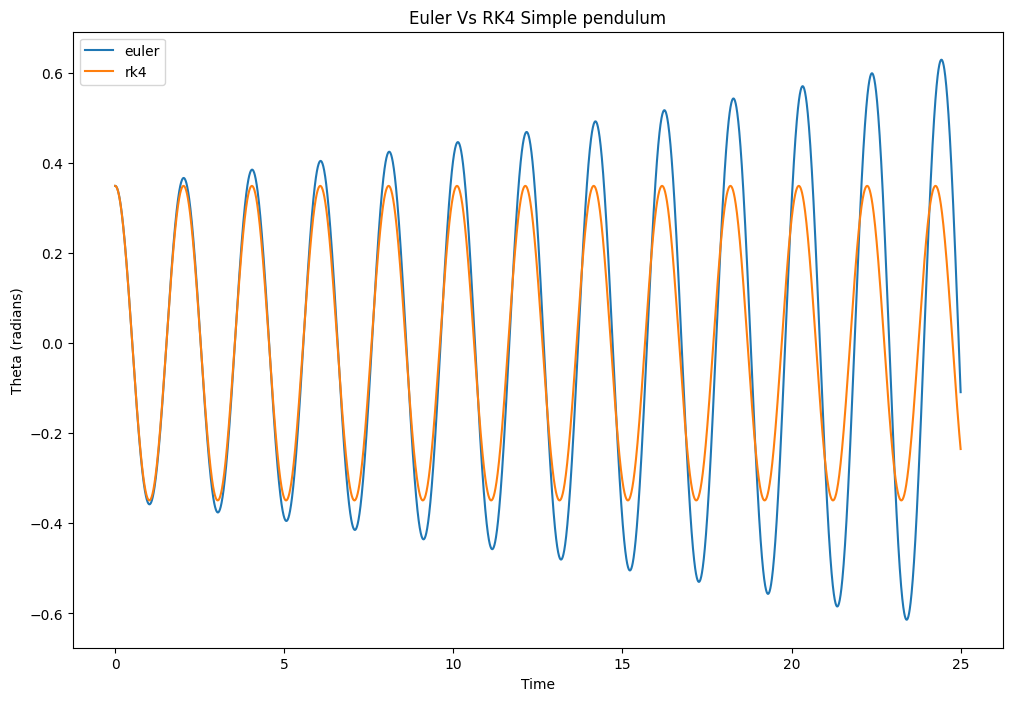

In [29]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method(dt=0.005, n_steps=5000)
rk4_x, rk4_y, rk4_times, rk4_thetas,rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(euler_times, euler_thetas, label='euler')
plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('Time')
plt.ylabel("Theta (radians)")
plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

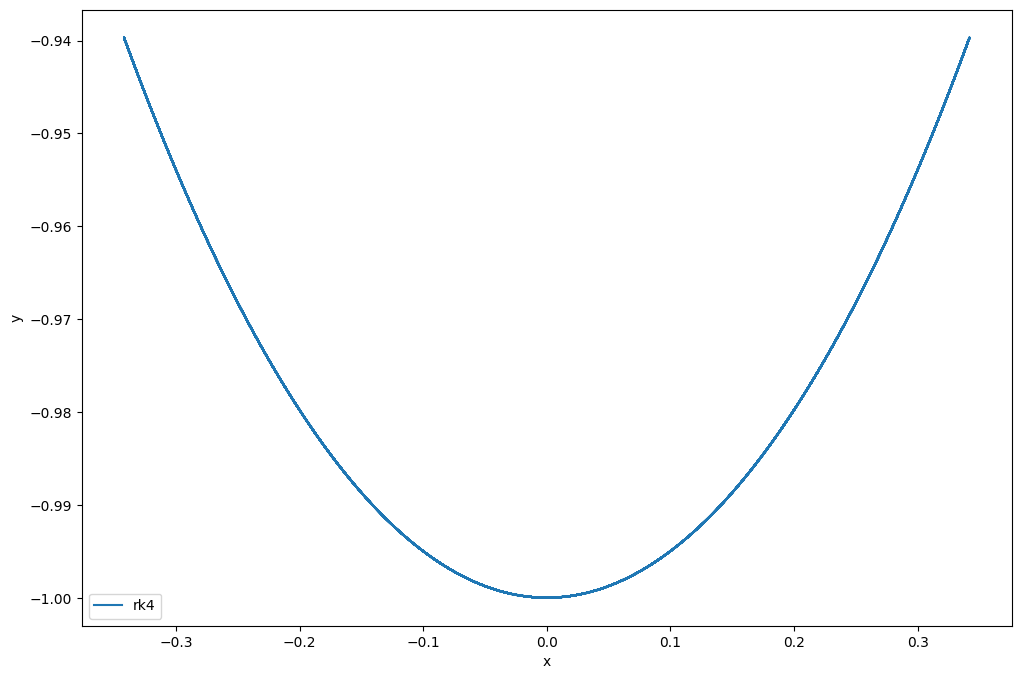

In [30]:
euler_x, euler_y, euler_times, euler_thetas  = euler_method(dt=0.005, n_steps=5000)
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(rk4_x, rk4_y, label='rk4')

#plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('x')
plt.ylabel("y")
#plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

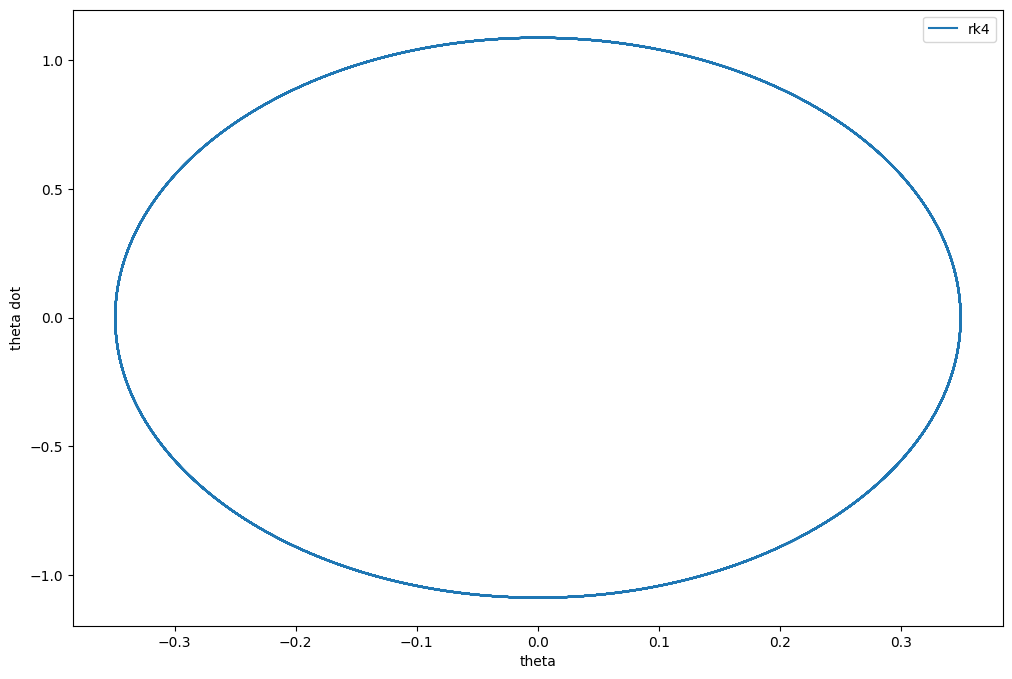

In [31]:
rk4_x, rk4_y, rk4_times, rk4_thetas, rk4_theta_dots = rk4_method(dt=0.005, n_steps=5000)


plt.figure(figsize=(12,8))
plt.plot(rk4_thetas, rk4_theta_dots, label='rk4')

#plt.plot(rk4_times, rk4_thetas, label='rk4')
plt.xlabel('theta')
plt.ylabel("theta dot")
#plt.title('Euler Vs RK4 Simple pendulum')
plt.legend()

Text(0.5, 1.0, 'Energy Conservation Check')

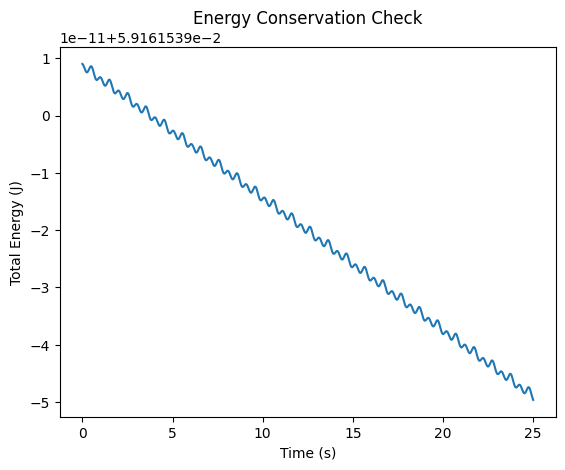

In [32]:
# Calculate total energy at each step
KE = 0.5*m*l**2*rk4_theta_dots**2  # Kinetic
PE = m*g*l*(1 - np.cos(rk4_thetas))  # Potential
E_total = KE + PE

plt.plot(rk4_times, E_total)
plt.xlabel('Time (s)')
plt.ylabel('Total Energy (J)')
plt.title('Energy Conservation Check')

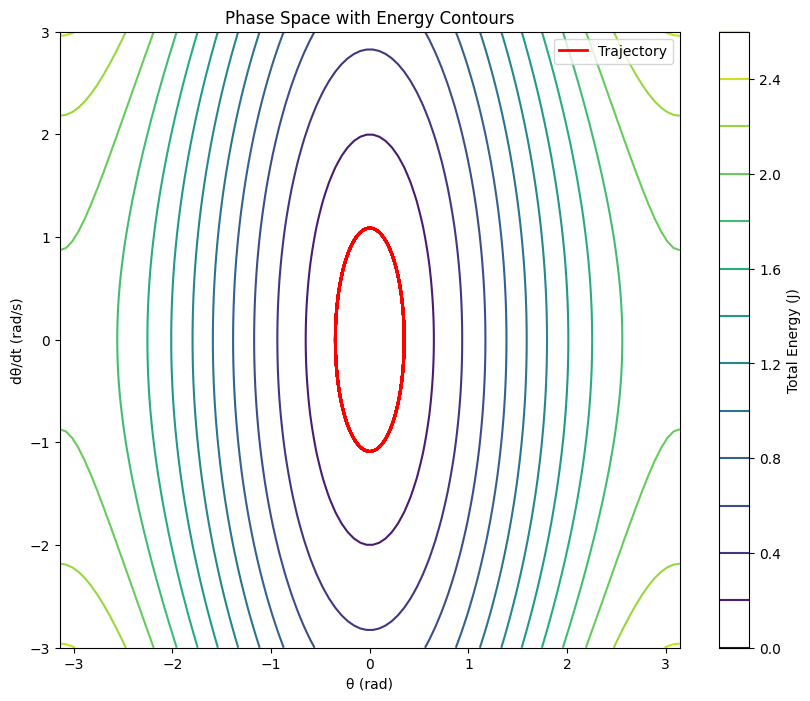

In [33]:
# Create a grid of theta and theta_dot values
theta_grid = np.linspace(-np.pi, np.pi, 100)
theta_dot_grid = np.linspace(-3, 3, 100)
Theta, Theta_dot = np.meshgrid(theta_grid, theta_dot_grid)

# Calculate energy at each point
KE = 0.5*m*l**2*Theta_dot**2
PE = m*g*l*(1 - np.cos(Theta))
E_total = KE + PE

# Plot energy contours
plt.figure(figsize=(10,8))
contours = plt.contour(Theta, Theta_dot, E_total, levels=15, cmap='viridis')
plt.colorbar(contours, label='Total Energy (J)')

# Overlay your actual trajectory
plt.plot(rk4_thetas, rk4_theta_dots, 'r-', linewidth=2, label='Trajectory')

plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Phase Space with Energy Contours')
plt.legend()

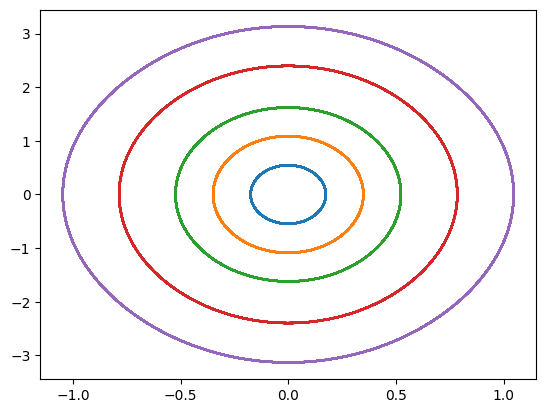

In [34]:
for theta_init in [10, 20, 30, 45, 60]:
    _, _, _, thetas, theta_dots = rk4_method(initial_theta_degrees=theta_init)
    plt.plot(thetas, theta_dots, label=f'{theta_init}°')

## jsut differnet inital conditions

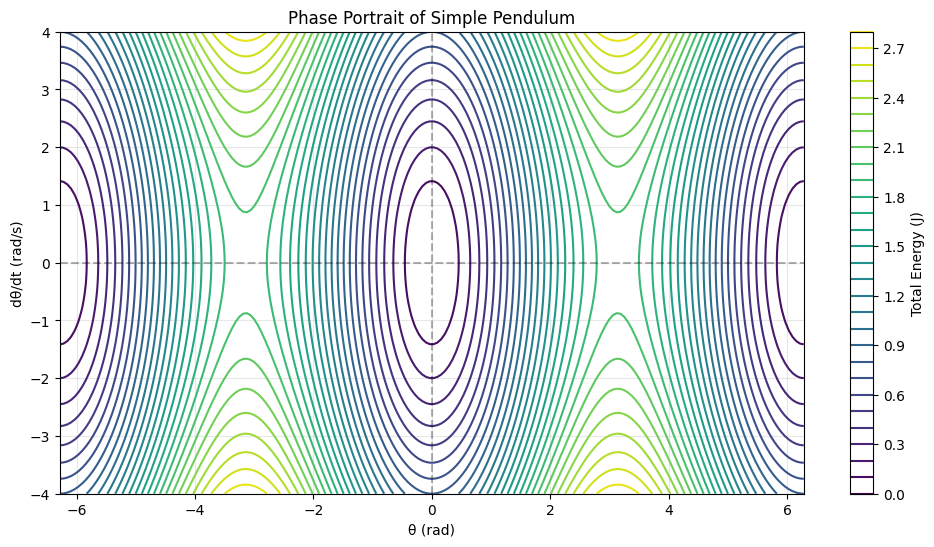

In [35]:
# Create a finer grid
theta_grid = np.linspace(-2*np.pi, 2*np.pi, 200)
theta_dot_grid = np.linspace(-4, 4, 200)
Theta, Theta_dot = np.meshgrid(theta_grid, theta_dot_grid)

# Calculate energy at each point
KE = 0.5*m*l**2*Theta_dot**2
PE = m*g*l*(1 - np.cos(Theta))
E_total = KE + PE

# Plot phase portrait
plt.figure(figsize=(12,6))

# Use more contour levels to see the "eyes"
contours = plt.contour(Theta, Theta_dot, E_total, levels=30, cmap='viridis')
plt.colorbar(contours, label='Total Energy (J)')

plt.xlabel('θ (rad)')
plt.ylabel('dθ/dt (rad/s)')
plt.title('Phase Portrait of Simple Pendulum')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)